<h1 style="border:2px solid red; text-align:center; padding:5px;">Comment réaliser une étude de statistiques bivariées en Python ?</h1>

## Objectifs :
- Mesurer la corrélation entre deux variables,
- Réaliser des tests statistiques pour valider la corrélation,
- Représenter la droite d'équation

## Sources de formation :
- [Fondamentaux des statistiques en Python - partie mesurer la corrélation bivariée](https://realpython.com/python-statistics/#summary-of-descriptive-statistics)

<h2>Contexte</h2>
<div>Nous allons nous intéresser au calcul des coefficients de corrélation, réalisés à partir des test de corrélation. Ces coefficients estiment l'existence et le puissance d'une relation entre deux variables. Il existe plusieurs types de relations : quantitative-quantitative, quantitative-qualitative et qualitative-qualitative. En fonction du type de variable et des conditions de faisabilité de chaque tests de corrélation.</div>

## Importer les modules

In [ ]:
## Manipuler les données et les fichiers
import pandas
import geopandas
import os

## Analyser
import scipy.stats
import numpy
import math
import statistics

## Afficher 
import matplotlib.pyplot as plt
import seaborn

<h2 style="border:1px solid green;">Qu'est-ce que l'analyse bivariée ?</h2>
<div>
<p>: portée sur l'analyse d'une paire de deux variables, X et Y. Chaque individu possède une caractéristique chez X et Y. Ainsi, l'individu I1 de l'ensemble des individus I est caractérisé par un x1 de X et un y1 de Y.

Par exemple, chaque commune du Val-de-Marne est caractérisée sa taille de population et son taux d'urbanisation.

L'idée étant de <span style="font-weight:bold;">comprendre les relations entre des variables</span> pour :
envisager leur évolution et ainsi avoir un meilleur contrôle sur un évènement contrôlable,
prédire des valeurs non mesurées (passé ou futur).

Par ailleurs, l'étude bivariée et de manière générale, des corrélations, est la brique de base pour réaliser des opérations statistiques plus poussées, comme la régression (prédiction), la classification (regroupement de variables ou d'individus en fonction de leur ressemblance), des "synthèses" de variables, pour diminuer le nombre d'élément à prendre en compte (exemple : passer d'une centaine de variables à 2 variables, tout en gardant le plus d'information possible).

Enfin, il faut bien noter que, la mesure de la corrélation n'est pas une mesure de la causalité !!!
</p>
</div>

### Les types de corrélation
On identifie **3 cas possibles** de corrélation :
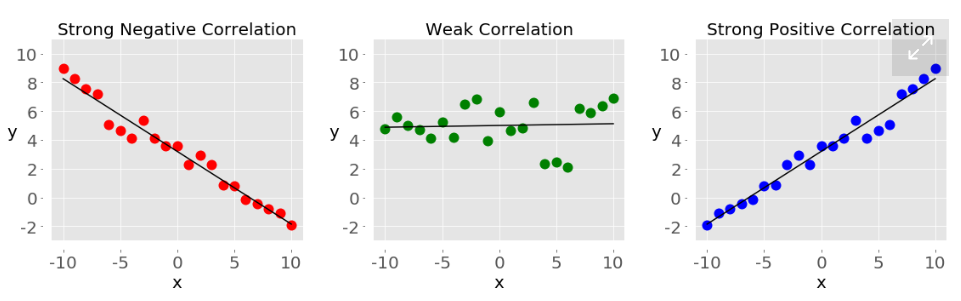

Il **semble** qu'il y ait une relation entre ces variables.

Il existe deux mesures de la corrélation : la covariance et le coefficient de corrélation. Voyons les plus en détail

## Analyse bivariée

In [ ]:
## Il nous faut d'abord des données sur lesquelles travailler :

## on a deux listes x, y
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

## qu'on passe en narray et en pandas series
x_, y_ = numpy.array(x), numpy.array(y) ## narray des listes d'origine
x__, y__ = pandas.Series(x_), pandas.Series(y_) ## Series issues des narray

### La covariance

: mesure l'intensité et le sens de la relation entre deux variables.
La formule de la covariance :
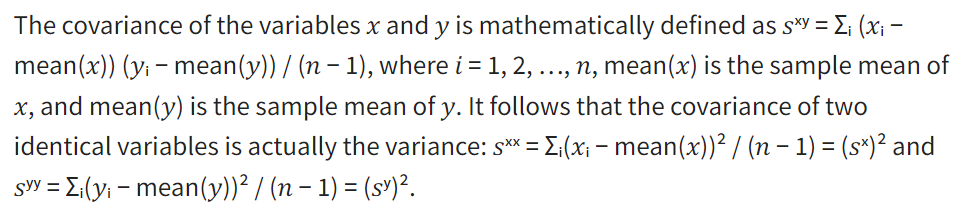

In [ ]:
## usage de numpy :
cov_ = numpy.cov(x_, y_)
cov_

La méthode .cov() de numpy nous retourne un tableau en deux dimensions.
A noter que là aussi, on retrouve les paramètres ddof et bias, par défaut en False. Mais paramétrables, au besoin !
Le tableau en deux dimensions, appelé **matrice** est organisé de la sorte :
covar(x,x) covar(x,y)
covar(y,x) covar(y,y)

Vérifions :

In [ ]:
print(numpy.var(x_, ddof=1)) ## 38.5
print(numpy.var(y_, ddof=1)) ## 13.91

In [ ]:
## Sachant que le résultat de covar est une matrice, on peut alors :
cov_xy = cov_[0, 1]
cov_xy ## attendu : 19.95

In [ ]:
## Cependant, on pourrait réaliser la même choses sur nos Series
## ça serait peut-être plus explicite ?
cov__xy = x__.cov(y__)
cov__xy

## Oui, ça l'est. Pour autant, on retrouve le même résutat.
## On a donc le choix de la méthode (si on préfère Pandas par exemple).
## Bien que le résultat soit le même, Numpy aura plus de paramètres et pourra
##+ donc donner un résultat tenant compte des attentes (sur une population,
##+ entière ou non par exemple !)

### Le coefficient de corrélation r

Le coefficient de corrélation, noté r, est une "standardisation" de la covariance. r peut prendre une valeur entre -1 et 1, et voici les significations possibles :
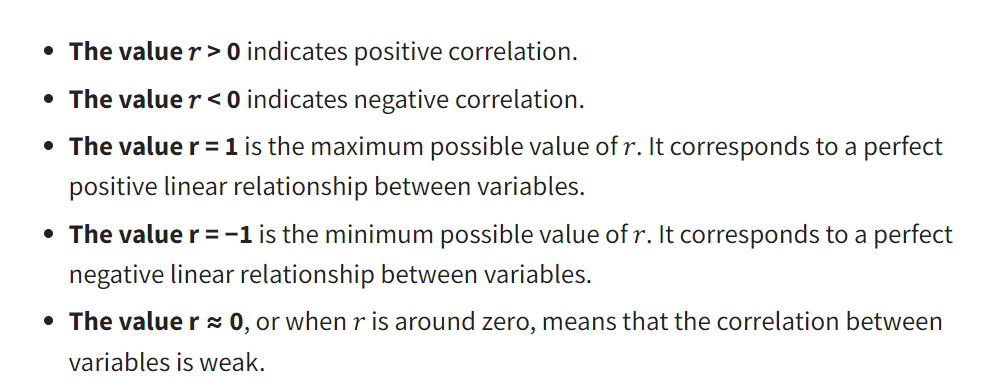

**OK mais alors comment savoir si y a une corrélation forte ou pas ?** Tout va dépendre du contexte d'application. Il est évident qu'en comparent deux r différents, vous pourriez déterminer quelle pare de variables à la relation la plus forte. Mais si vous avez une paire, vous pouvez considérer :
- entre 0 et 0.5 (pareil pour le négatif) : la relation est faible.
- Au-delà de 0.5 (pareil pour le négatif) : la relation est forte.

Ces paliers sont souvent utilisés en sciences sociales, malgré leur critique ... Dans tous les cas, il faut choisir une référence, pour l'ensemble de l'étude : une technique particulière éprouvée scientifiquement, un standard du domaine, etc.

En revanche, **la significativité** de votre résultat est bien encadrée, on utilise la p-value. Lorsque la p-value est inférieur à seuil (souvent on prendre 5%) alors le r est significatif. Significatif sans le sens où il n'est pas dû au hasard. Autrement dit, "au seuil de 5%, le r est significativement différent du hasard".

Formellement, le coefficient de corrélation est calculé ainsi :
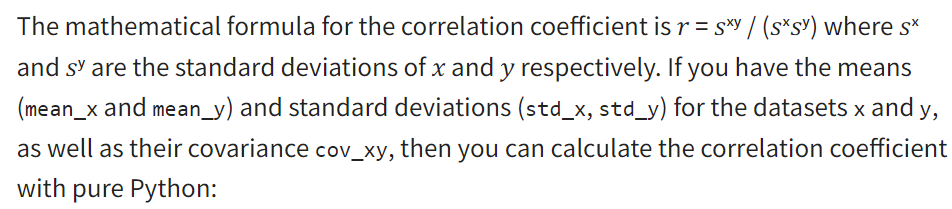

#### Calculer r de Bravais-Pearson avec scipy

In [ ]:
## calculer le r et sa p-value avec scipy :
r, p = scipy.stats.pearsonr(x_, y_)
print(r) ## coefficient de corrélation
print(p) ## p-value, mesure de la significativité de la variable

Donc là, on vient de voir deux mesures de la corrélation entre deux variables quantitatives. On a d'abord vu la covariance, qui va mesurer la direction de la corrélation. Elle est utilisée dans le calcul du r de Bravais-Pearson (le r qu'on a calculé précédemment). Ce r est une "normalisation" de la covariance. En effet, alors que r varie entre -1 et 1, la covariance est uen valeur, sans encadrement. Elle servira plutôt à la comparaison ... Le r permet d'informer sur l'intensité (corrélation forte ou non) et le sens (négative ou positive) de la relation.  
Cet [article](https://datascience.eu/fr/mathematiques-et-statistiques/deconcerte-par-la-covariance-et-la-correlation/) fourni des explications plus précises pour bien distinguer les deux, et comprendre leur intérêt à chacun.

#### Le r de Bravais-Pearson avec scipy

In [ ]:
## On peut également obtenir le même résultat avec Numpy : 
corr_matrix = numpy.corrcoef(x_, y_)
corr_matrix

On retrouve bien un r = 0.87. Par contre, il nous quand de l'information sur la significativité (différence du hasard) de cette relation.

#### Calculer le r de Bravais-Pearson avec Pandas

In [ ]:
x__.corr(y__) ## 0.8619500056316061

### Equation de régression linéaire avec scipy

In [ ]:
## Avec scipy :
scipy.stats.linregress(x_, y_)

## retourne les éléments pour faire une droite de régression

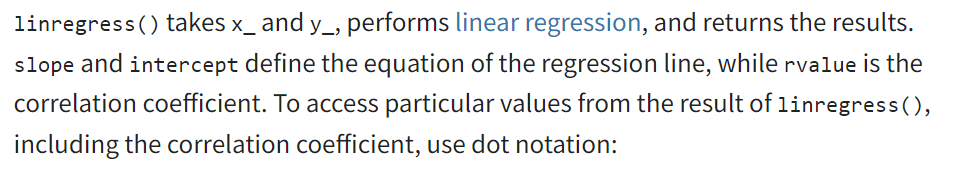